In [1]:
import pandas as pd
import duckdb
import matplotlib.pyplot as plt

# Create a DuckDB connection
con = duckdb.connect()


In [2]:
        # Load data from CSV into a DataFrame
        df = con.sql("""
                    SELECT * from read_csv_auto('./Code_Violations_20241027.csv',
                     header=True,
                     filename=True,
                     types={'Zone': 'VARCHAR'})
                """).df()
        print(df.head())


   Service Request ID Service Request  Str Num Str Prefix  \
0          1248347489     17-00042325      NaN       None   
1          1164245682     15-00337642      NaN       None   
2          1214024834     16-00291778   9400.0       None   
3          1145374933     15-00042174   4100.0       None   
4          1229955921     16-00501361   6105.0       None   

                           Str Nam Str Suffix   Zone  \
0      HILLCREST RD & ABERDEEN AVE       None   None   
1  N JIM MILLER RD & MILITARY PKWY       None  75227   
2                      TIMBERBLUFF         RD  75249   
3                             PARK         LN  75220   
4                         OVERLOOK         DR  75227   

                       Department Nuisance  Status             Created  \
0  Code Compliance District Group     None  CLOSED 2017-01-31 14:40:00   
1  Code Compliance District Group     None  CLOSED 2015-07-25 09:16:00   
2  Code Compliance District Group     None  CLOSED 2016-06-16 14:19:00   


<Axes: >

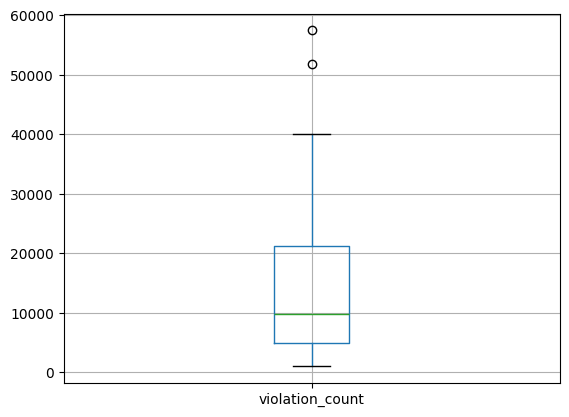

In [8]:
# Query to get violation count by Zone
df3 = con.sql("""
            SELECT CAST(Zone as VARCHAR) as Zipcode, COUNT(Zone) as violation_count
            FROM df
            GROUP BY Zone HAVING COUNT(Zone) > 1000
            ORDER BY violation_count DESC
        """).df()
df3
df3.boxplot()

In [12]:
df4 = con.sql("select distinct Nuisance from df order by Nuisance")
pd.options.display.max_rows = 100
df4

┌──────────────────────────────────────────────────────────┐
│                         Nuisance                         │
│                         varchar                          │
├──────────────────────────────────────────────────────────┤
│ Bulky Trash Violations - CCS                             │
│ Dumpster Violation - CCS                                 │
│ Garage Sale - CCS                                        │
│ Garage Sale Tracking - CCS                               │
│ Graffiti Abatement Request - CCS                         │
│ Graffiti Consent Form - CCS                              │
│ Graffiti Private Property - Residential/Commercial - CCS │
│ Hand Bills/Fliers Complaint - CCS                        │
│ High Weeds - CCS                                         │
│ Illegal Dumping - CCS                                    │
│           ·                                              │
│           ·                                              │
│           ·           